#  Material Balance Equation by using Havlena and Odeh Method

**<span style="color: red;">Some definitions and informations about the concept:</span>**

*The Havlena and Odeh method is a way of applying the material balance equation (MBE) to estimate the original oil in place (OOIP) of a reservoir. It involves rearranging the MBE into a linear form. Then the slope of that line gives the OOIP of the reservoir.* 

In order to generate we need some parameters which are called "Havlena and Odeh parameters". These are:

**F = Net production.
  Eo = Oil expansion.
  Ef,w = Formation (rock) and water expansion.
  Eg = Gas expansion**
  
*We can customize our line equation based on the conditions of our reservoir. In our case the reservoir is undersaturated meaning that tere is no free gas initally and our formatioın and water compressibility is negligible meaing that rock and water expansions are negligible when we compare with oil expansion. So our line equation becomes:*

**F = N * Eo --> N is here the slope of our straight line giving us the value of OOIP which we aimed to find it.*


**Importation of necessary libraries;**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

**Uploading the data from Excel file into a dataframe and doing some arrangments on it;**

In [3]:
Prod_Pressure_Hist=pd.read_excel("reservoir data.xlsx",sheet_name="Prod_Pressure_History",header=1)
Prod_Pressure_Hist.drop(["Unnamed: 83","Unnamed: 84"],axis=1, inplace=True)
Prod_Pressure_Hist.head()

,n,Months,"PR, psia","qo, STB/d","qw, STB/d","qg, SCF/d","Pbhp, psia","qo, STB/d.1","qw, STB/d.1","qg, SCF/d.1",...,"qg, SCF/d.17","Pbhp, psia.17","qo, STB/d.18","qw, STB/d.18","qg, SCF/d.18","Pbhp, psia.18","qo, STB/d.19","qw, STB/d.19","qg, SCF/d.19","Pbhp, psia.19"
0,1,Jan-15,1094.325806,0.0,0.0,0.0,NaN,569.51818,0.000147,55446.388,...,0.000,NaN,0.00000,0.000000,0.000,NaN,0.0,0.0,0.0,NaN
1,2,Feb-15,1086.975342,0.0,0.0,0.0,NaN,515.92029,0.000162,37940.076,...,0.000,NaN,0.00000,0.000000,0.000,NaN,0.0,0.0,0.0,NaN
2,3,2015-03-01 00:00:00,1080.957642,0.0,0.0,0.0,NaN,485.77048,0.000138,37860.192,...,0.000,NaN,819.57120,0.000298,49427.920,NaN,0.0,0.0,0.0,NaN
3,4,Apr-15,1047.343506,0.0,0.0,0.0,NaN,410.40441,0.000200,38082.546,...,0.000,NaN,574.37016,0.000273,50094.668,NaN,0.0,0.0,0.0,NaN
4,5,2015-05-01 00:00:00,1022.227905,0.0,0.0,0.0,NaN,295.30260,0.000147,24656.293,...,21190.173,739.691,471.70782,0.000267,30139.956,NaN,0.0,0.0,0.0,NaN


**Generating a list which includes only the oil flow rate in order to make analysis of oil production easier;**

In [4]:
qo_columns = [col for col in Prod_Pressure_Hist.columns if col.startswith("qo")]
Prod_Pressure_Hist[qo_columns]

,"qo, STB/d","qo, STB/d.1","qo, STB/d.2","qo, STB/d.3","qo, STB/d.4","qo, STB/d.5","qo, STB/d.6","qo, STB/d.7","qo, STB/d.8","qo, STB/d.9","qo, STB/d.10","qo, STB/d.11","qo, STB/d.12","qo, STB/d.13","qo, STB/d.14","qo, STB/d.15","qo, STB/d.16","qo, STB/d.17","qo, STB/d.18","qo, STB/d.19"
0,0.000000,569.518180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,515.920290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,485.770480,0.000000,0.000000,0.000000,0.000000,133.729200,271.033200,950.018120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,819.571200,0.000000
3,0.000000,410.404410,0.000000,0.000000,0.000000,0.000000,140.041890,231.108240,581.315130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,574.370160,0.000000
4,0.000000,295.302600,146.722750,95.650750,0.000000,0.000000,130.870850,193.431920,483.185080,0.000000,0.000000,0.000000,339.419050,0.000000,0.000000,455.807520,0.000000,208.750390,471.707820,0.000000
5,0.000000,318.163740,93.501240,90.070246,0.000000,0.000000,99.144510,157.669680,442.510570,0.000000,0.000000,0.000000,295.868510,0.000000,0.000000,295.172700,0.000000,171.672750,356.566360,0.000000
6,0.000000,260.048800,83.571915,81.412884,0.000000,67.701060,77.447916,173.216260,407.642830,64.836728,67.873006,51.733086,242.229060,55.143789,0.000000,267.829480,0.000000,192.967800,293.628580,0.000000
7,0.000000,211.517710,77.334387,60.801615,0.000000,54.557040,65.397870,140.826750,259.483500,49.657944,78.462944,35.541478,165.213740,48.593454,0.000000,294.510080,0.000000,123.549400,224.994150,0.000000
8,59.605332,211.027660,89.507958,49.083984,171.105840,51.860367,78.557628,96.207320,307.024160,50.136424,52.022740,35.828585,158.839350,50.811944,106.045524,203.297920,40.270909,111.721450,219.280900,130.389280
9,60.163044,133.065800,72.617094,60.272512,163.154000,37.275868,70.052463,82.650260,209.518200,34.864486,59.302530,35.146854,136.599300,29.637040,94.393290,190.980900,34.527696,105.959160,208.118710,113.093700


**Defining Havlena and Odeh parameters into another dataframe;** 

In [5]:
Npo_STB_per_day=Prod_Pressure_Hist[qo_columns].sum(axis=1) #The average daily oil production of all wells in the given month data. For all 23 months.
Npo_cumulative_STB=(30*Npo_STB_per_day).cumsum() # The consecutive cumulative oil production of all wells in one month. For all 23 months.

In [6]:
MBE_parameters=pd.DataFrame({"Reservoir Pressure, psia":Prod_Pressure_Hist["PR, psia"],
                             "Npo, STB/day":Npo_STB_per_day,
                            "Npo, STB (cumulative)":Npo_cumulative_STB})
MBE_parameters

,"Reservoir Pressure, psia","Npo, STB/day","Npo, STB (cumulative)"
0,1094.325806,569.518180,17085.545400
1,1086.975342,515.920290,32563.154100
2,1080.957642,2660.122200,112366.820100
3,1047.343506,1937.239830,170484.015000
4,1022.227905,2820.848730,255109.476900
5,985.331604,2320.340306,324719.686080
6,958.160889,2387.283194,396338.181900
7,928.662598,1890.442062,453051.443760
8,904.242554,2272.625275,521230.202010
9,876.622620,1931.392907,579171.989220


**Due to formation volume factor is going to change with change in pressure, we should find the trend of this change by doing linerization as follows;**

In [7]:
# We have data to linearize.
# Reading the data;
Bo_data=pd.read_excel("reservoir data.xlsx",sheet_name="FluidProp",header=2)
columns_to_drop=Bo_data.columns[7:]
Bo_data.drop(columns=columns_to_drop,inplace=True)


In [8]:
#Bo_trendline_data=
Bo_trendline=pd.DataFrame({"Bo, rb/STB":(Bo_data["Bo, rb/STB"].loc[8:17]),
                          "p, psia":(Bo_data["p, psia"].loc[8:17])})
Bo_trendline.reset_index(inplace=True)
Bo_trendline.drop("index",inplace=True,axis=1)
Bo_trendline

,"Bo, rb/STB","p, psia"
0,1.07648,509.655
1,1.075481,571.526
2,1.074484,633.396
3,1.073487,695.266
4,1.072491,757.136
5,1.071496,819.005
6,1.070502,880.875
7,1.069509,942.745
8,1.064137,1356.1025
9,1.059995,1769.46


<Axes: xlabel='Bo, rb/STB', ylabel='p, psia'>

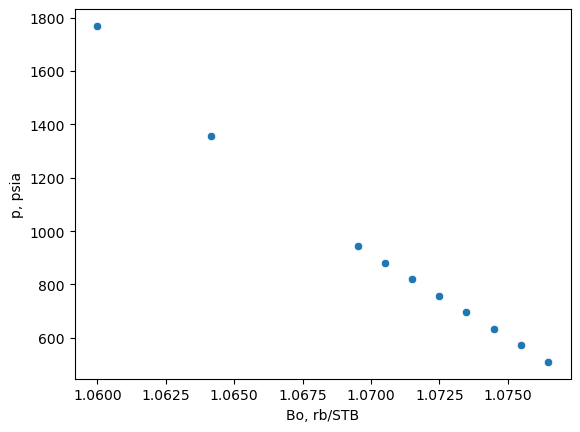

In [9]:
sns.scatterplot(y="p, psia",x="Bo, rb/STB",data=Bo_trendline)  # the scatter plot of our data

In [10]:
linear_model_Bo = LinearRegression()
x=np.array(Bo_trendline["p, psia"]).reshape(-1,1)
y=np.array(Bo_trendline["Bo, rb/STB"]).reshape(-1,1)  # Generating a linear model

In [11]:
linear_model_Bo.fit(x,y)

LinearRegression()

In [14]:
m=linear_model_Bo.coef_ # slope
m

array([[-1.32269117e-05]])

In [15]:
a=linear_model_Bo.intercept_ # cosntant
a
# Line equation: y= mx + a --> y= Bo , x= Reservoir pressure 

array([1.08262483])

In [16]:
MBE_parameters["Bo, rb/STB"]=MBE_parameters["Reservoir Pressure, psia"]*float(m)+float(a)
MBE_parameters

,"Reservoir Pressure, psia","Npo, STB/day","Npo, STB (cumulative)","Bo, rb/STB"
0,1094.325806,569.518180,17085.545400,1.068150
1,1086.975342,515.920290,32563.154100,1.068248
2,1080.957642,2660.122200,112366.820100,1.068327
3,1047.343506,1937.239830,170484.015000,1.068772
4,1022.227905,2820.848730,255109.476900,1.069104
5,985.331604,2320.340306,324719.686080,1.069592
6,958.160889,2387.283194,396338.181900,1.069951
7,928.662598,1890.442062,453051.443760,1.070341
8,904.242554,2272.625275,521230.202010,1.070664
9,876.622620,1931.392907,579171.989220,1.071030


**Generating the oil expansion data ( Eo = Bo - Boi);**

In [18]:
Boi=MBE_parameters["Bo, rb/STB"].loc[0]
MBE_parameters["Eo, rb/STB"]=MBE_parameters["Bo, rb/STB"]-Boi

MBE_parameters.head()

,"Reservoir Pressure, psia","Npo, STB/day","Npo, STB (cumulative)","Bo, rb/STB","Eo, rb/STB"
0,1094.325806,569.51818,17085.5454,1.068150,0.000000
1,1086.975342,515.92029,32563.1541,1.068248,0.000097
2,1080.957642,2660.12220,112366.8201,1.068327,0.000177
3,1047.343506,1937.23983,170484.0150,1.068772,0.000621
4,1022.227905,2820.84873,255109.4769,1.069104,0.000954


**Generating the net production (F) data;**

In [19]:
MBE_parameters["F, rb"]=MBE_parameters["Npo, STB (cumulative)"]*MBE_parameters["Bo, rb/STB"]
MBE_parameters

,"Reservoir Pressure, psia","Npo, STB/day","Npo, STB (cumulative)","Bo, rb/STB","Eo, rb/STB","F, rb"
0,1094.325806,569.518180,17085.545400,1.068150,0.000000,1.824993e+04
1,1086.975342,515.920290,32563.154100,1.068248,0.000097,3.478551e+04
2,1080.957642,2660.122200,112366.820100,1.068327,0.000177,1.200445e+05
3,1047.343506,1937.239830,170484.015000,1.068772,0.000621,1.822085e+05
4,1022.227905,2820.848730,255109.476900,1.069104,0.000954,2.727385e+05
5,985.331604,2320.340306,324719.686080,1.069592,0.001442,3.473176e+05
6,958.160889,2387.283194,396338.181900,1.069951,0.001801,4.240626e+05
7,928.662598,1890.442062,453051.443760,1.070341,0.002191,4.849198e+05
8,904.242554,2272.625275,521230.202010,1.070664,0.002514,5.580627e+05
9,876.622620,1931.392907,579171.989220,1.071030,0.002880,6.203105e+05


**Linearization to find OOIP;**

In [20]:
linear_model_OOIP=LinearRegression()

In [21]:
x1=np.array(MBE_parameters["Eo, rb/STB"]).reshape(-1,1)
y1=np.array(MBE_parameters["F, rb"]).reshape(-1,1)

linear_model_OOIP.fit(x1,y1)

LinearRegression()

In [30]:
OOIP=float(linear_model_OOIP.coef_) # original oil in place (STB)
MMSTB= OOIP/10**6

# OOIP:

In [31]:
print(OOIP,"STB = ",MMSTB,"MMSTB")

190184109.01930404 STB =  190.18410901930403 MMSTB
